In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.ndimage.filters import gaussian_filter
from copy import deepcopy

import os

In [110]:
'''
FER2013 emotion abels:
0 - Angry
1 - Disgust
2 - Fear
3 - Happy
4 - Sad
5 - Surprise
6 - Neutral
'''

def load_fer2013(filename='fer2013/fer2013.csv'):
    df = pd.read_csv(filename, sep=',',header=0)
    images = []
    labels = []
    for each in df['pixels'].tolist():
        pom = np.array(each.split(' '))
        pom = np.reshape(pom, (48,48))
        pom = cv2.normalize(pom.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
        images.append(pom)
    for each in df['emotion'].tolist():
        labels.append(int(each))
    return images, labels

'''
CC emotion labels:
1 - Angry 45
2 - Contempt 18
3 - Disgust 59
4 - Fear 25
5 - Happy 69
6 - Sadness 28
7 - Surprise 83
'''
def load_cohn_canade(rootdir='Cohn_canade\\extended-cohn-kanade-images\\',
                     rootdir2='Cohn_canade\\Emotion_labels\\Emotion'):
    f_img = []
    f_img_path = []
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            f_img_path.append(os.path.join(subdir, file))
            f_img.append(f_img_path[-1].split('\\')[-1].split('.')[0])


    f_lbl = []
    f_lbl_path = []
    for subdir, dirs, files in os.walk(rootdir2):
        for file in files:
            f_lbl_path.append(os.path.join(subdir, file))
            f_lbl.append(f_lbl_path[-1].split('\\')[-1].split('.')[0][:-8])

    labels = []
    images = []
    for i in range(len(f_lbl)):
        for j in range(len(f_img)):
            if f_lbl[i] == f_img[j]:
                labels.append(int(np.loadtxt(f_lbl_path[i])))
                images.append(cv2.imread(f_img_path[j],0))
    return images, labels

# HAAR Cascades
def locate_face(img_list, label_list, haar='haarcascade_frontalface_default.xml'):
    face_cascade = cv2.CascadeClassifier(haar)
    ilist = deepcopy(img_list)
    llist = deepcopy(label_list)
    j = []
    for i in range(len(ilist)):
        ilist[i] = gaussian_filter(ilist[i], 1)
        faces = face_cascade.detectMultiScale(ilist[i], 1.3, 5)
        if len(faces) == 1:
            for (x,y,w,h) in faces:    
                ilist[i] = ilist[i][y:(y+h), x:(x+w)]
                ilist[i] = cv2.resize(ilist[i], (48, 48))
        else:
            print('Either more than 1 or no face detected.')
            print('Removing image ' + str(i) + ' from collection.')
            j.append(i)
    for each in j:
        del ilist[each]
        del llist[each]

    return ilist, llist

def floatify(ilist):
    for i in range(len(ilist)):
        ilist[i] = cv2.normalize(ilist[i].astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    return ilist

def load_everything():
    fer_images, fer_labels = load_fer2013()
    cc_images, cc_labels = load_cohn_canade()
    
    cc_images, cc_labels = locate_face(cc_images, cc_labels)
    cc_images = floatify(cc_images)
    
    return fer_images, fer_labels, cc_images, cc_labels

In [111]:
fer_images, fer_labels, cc_images, cc_labels = load_everything()

Either more than 1 or no face detected.
Removing image 134 from collection.


0


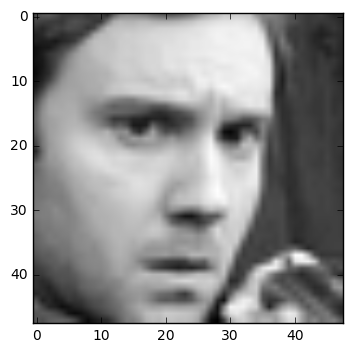

[[ 0.29648241  0.34673367  0.35678392 ...,  0.20603015  0.16080402
   0.15075377]
 [ 0.27135678  0.25125628  0.2361809  ...,  0.22613065  0.20603015
   0.16582915]
 [ 0.1959799   0.16080402  0.2160804  ...,  0.19095477  0.22613065
   0.18090452]
 ..., 
 [ 0.40201005  0.27135678  0.15577889 ...,  0.30653266  0.22613065
   0.16080402]
 [ 0.33165829  0.35678392  0.34170854 ...,  0.47236181  0.29648241
   0.1758794 ]
 [ 0.33165829  0.30653266  0.36683417 ...,  0.47738693  0.49246231
   0.35678392]]
3


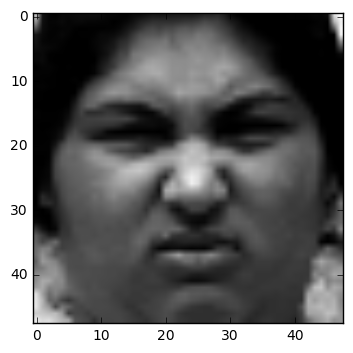

[[ 0.75113122  0.0678733   0.01809955 ...,  0.05429864  0.85972851  1.        ]
 [ 0.56561086  0.05882353  0.02262443 ...,  0.00904977  0.69683258
   0.9321267 ]
 [ 0.32579186  0.04977376  0.02262443 ...,  0.          0.37556561
   0.96832579]
 ..., 
 [ 0.90045249  0.70588235  0.58371041 ...,  0.67873303  0.71040724
   0.54751131]
 [ 0.79638009  0.77375566  0.73303167 ...,  0.74660633  0.71945701
   0.59728507]
 [ 0.91402715  0.85067873  0.86425339 ...,  0.67420814  0.56561086
   0.58823529]]


In [112]:
print(fer_labels[0])
plt.imshow(fer_images[0], cmap = 'gray')
plt.show()
print(fer_images[0])

print(cc_labels[0])
plt.imshow(image_list[0], cmap = 'gray')
plt.show()
print(cc_images[0])


In [113]:
print(len(fer_images), len(fer_labels), len(cc_images), len(cc_labels))

35887 35887 326 326
